In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


------------------------------------------
✅ Runtime: 263.1 ms | 💾 Mem: 212.39 MB (Δ +26.89 MB) | ⚙️ CPU: 6.7%


In [7]:
co2_df = pd.read_csv("./data/co2/korean_cities_environmental_data_fake.csv")
co2_df['datetime'] = pd.to_datetime(co2_df['datetime'])
# co2_df = co2_df[(co2_df['region']== REGION) & (co2_df['city'] == CITY)]
co2_df

,datetime,region,city,electricity_usage_kwh,traffic_volume_vehicles,industrial_output_units,temperature_celsius,humidity_percent,public_transport_passengers,population_density_per_km2,co2_emissions_ppm
0,2025-11-08 18:58:35.040324,Busan,Busanjin-gu,4971.98,1075.0,1087.85,12.86,68.7,932.0,915.0,453.41
1,2025-11-08 18:58:35.040324,Busan,Gangseo-gu,6252.59,1780.0,2851.46,9.53,69.0,2196.0,2603.0,478.55
2,2025-11-08 18:58:35.040324,Busan,Haeundae-gu,9007.39,22566.0,976.28,11.56,68.9,26638.0,8427.0,547.03
3,2025-11-08 18:58:35.040324,Busan,Saha-gu,9259.80,3322.0,1191.44,8.34,60.0,459.0,116.0,527.42
4,2025-11-08 18:58:35.040324,Busan,Suyeong-gu,2741.12,628.0,551.91,9.18,72.5,1151.0,357.0,489.98
...,...,...,...,...,...,...,...,...,...,...,...
5835,2025-11-11 18:58:35.040324,Ulsan,Buk-gu,7963.19,5104.0,4319.10,8.16,72.8,3812.0,2644.0,525.85
5836,2025-11-11 18:58:35.040324,Ulsan,Dong-gu,7653.56,3724.0,908.54,11.81,55.9,2506.0,2815.0,543.28
5837,2025-11-11 18:58:35.040324,Ulsan,Jung-gu,26453.34,11577.0,2804.36,10.72,67.5,30834.0,13073.0,551.38
5838,2025-11-11 18:58:35.040324,Ulsan,Nam-gu,10561.30,2362.0,2053.55,9.58,59.0,2616.0,2894.0,562.73



------------------------------------------
✅ Runtime: 19.0 ms | 💾 Mem: 218.52 MB (Δ +6.12 MB) | ⚙️ CPU: 50.0%


R² score on test set: 0.20333254999085526


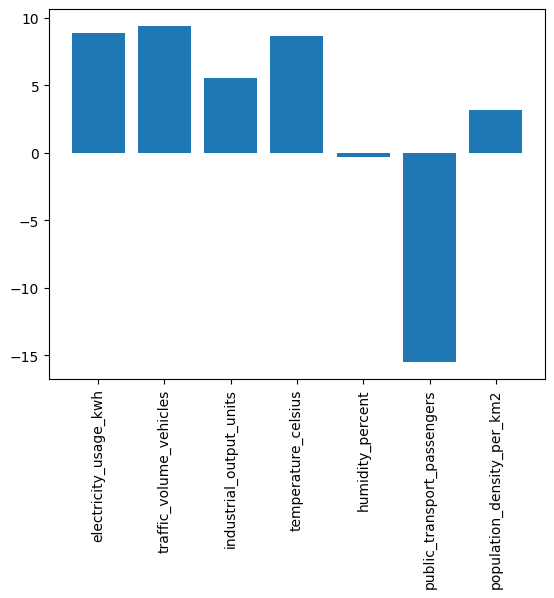


------------------------------------------
✅ Runtime: 87.6 ms | 💾 Mem: 217.11 MB (Δ -1.41 MB) | ⚙️ CPU: 50.0%


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

x_series = co2_df.drop(['co2_emissions_ppm', 'datetime', 'region', 'city'], axis=1)
# Split features and target
X = x_series.values
y = co2_df['co2_emissions_ppm'].values  # no need for reshape here

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Define and train Lasso model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Evaluate model
score = lasso_reg.score(X_test, y_test)
print("R² score on test set:", score)

lasso_coef = lasso_reg.coef_
plt.bar(x_series.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()


In [11]:
new_record_scaled = scaler.transform(X_test[5].reshape(1, -1))
predicted_co2 = lasso_reg.predict(new_record_scaled)[0]

# Compare with mean or expected range
mean_pred = np.mean(y_train)
std_pred = np.std(y_train)

if predicted_co2 > mean_pred + 2 * std_pred:
    print("⚠️ This record indicates unusually high CO₂ levels (over normal).")
elif predicted_co2 < mean_pred - 2 * std_pred:
    print("✅ Unusually low CO₂ levels (under normal).")
else:
    print("Normal range.")

Normal range.

------------------------------------------
✅ Runtime: 12.1 ms | 💾 Mem: 95.23 MB (Δ -148.50 MB) | ⚙️ CPU: 29.3%
